# Curso de Machine Learning con Python
## Trabajo Práctico Final: Aprendizaje supervisado y no supervisado

Alumno: Franco Giordano

# Importación de librerías

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# sns.color_palette("husl", 9)

# Adquisición de datos

Para la realización de este trabajo, vamos a utilizar el dataset *wine* de sklearn.

In [2]:
from sklearn.datasets import load_wine
wines = load_wine(as_frame=True)
X = wines["data"]
y = wines["target"]
columnas = list(X.columns)
descripcion = wines["DESCR"]

### Características del dataset

In [3]:
print(descripcion[19:547])

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2


In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
X.describe().map(lambda x: round(x,2))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: target
Non-Null Count  Dtype
--------------  -----
178 non-null    int32
dtypes: int32(1)
memory usage: 844.0 bytes


In [8]:
y.value_counts().sort_index()

target
0    59
1    71
2    48
Name: count, dtype: int64

Observamos que el dataset es un conjunto de 178 registros formado por 13 variables feature y una variable de salida, la cual divide al dataset en las clases "0", "1" y "2". Se comprobó también que ningún registro tiene un valor nulo.

# Normalización de datos

Para el mismo, utilizaremos la función StandardScaler de Sklearn

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columnas)
X_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [10]:
X_scaled.describe().map(lambda x: round(x,2))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97


# Análisis exploratorio de datos

Para esta sección, vamos a visualizar las distribuciones y gráficos para el dataset normalizado y el no normalizado.

## I. Distribución de datos según clase

In [75]:
def graficar_boxplots(X, y, titulo):
    fig, ax = plt.subplots(3,5,figsize=(15,10))
    columnas = X.columns
    ax[0,2].set_title(titulo, color='green')
    for i, ax in enumerate(fig.axes):
        try:
            sns.boxplot(data=X,x=columnas[i],hue=y,ax=ax)
        except:
            ax.remove()

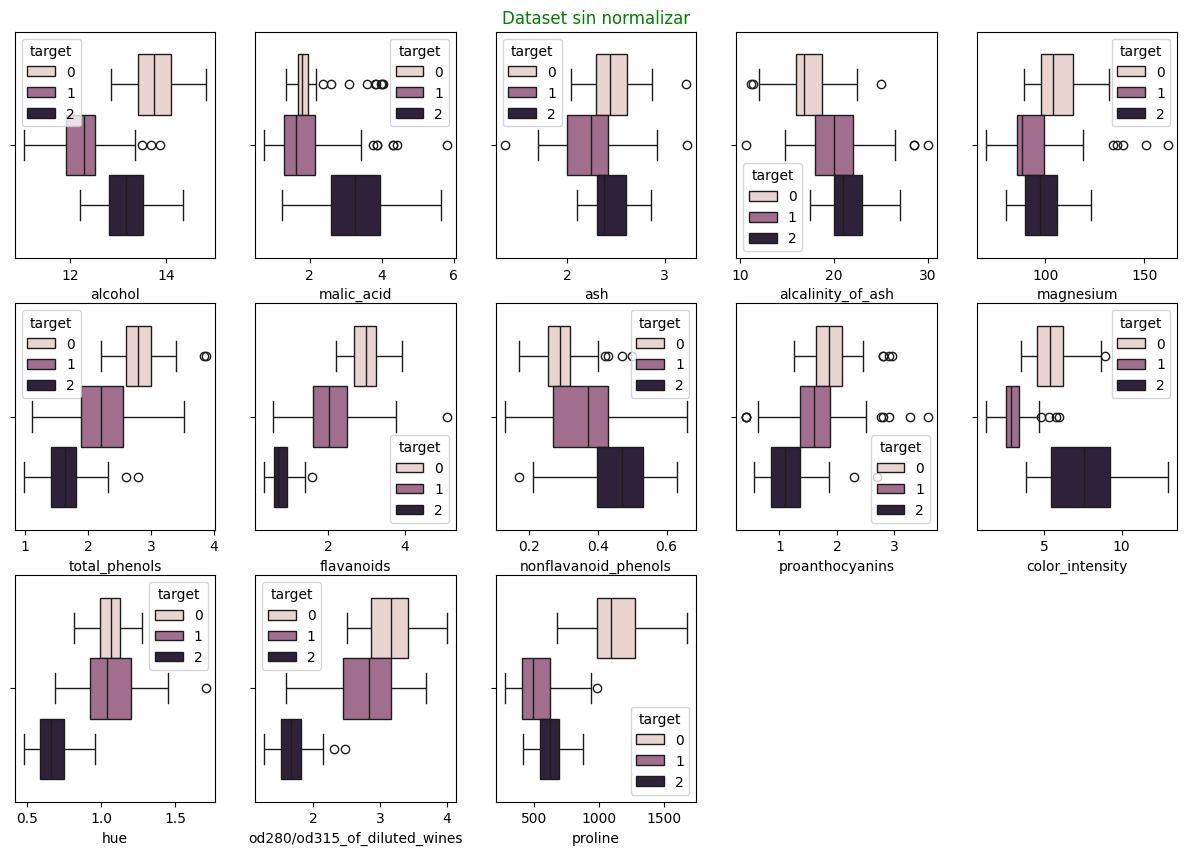

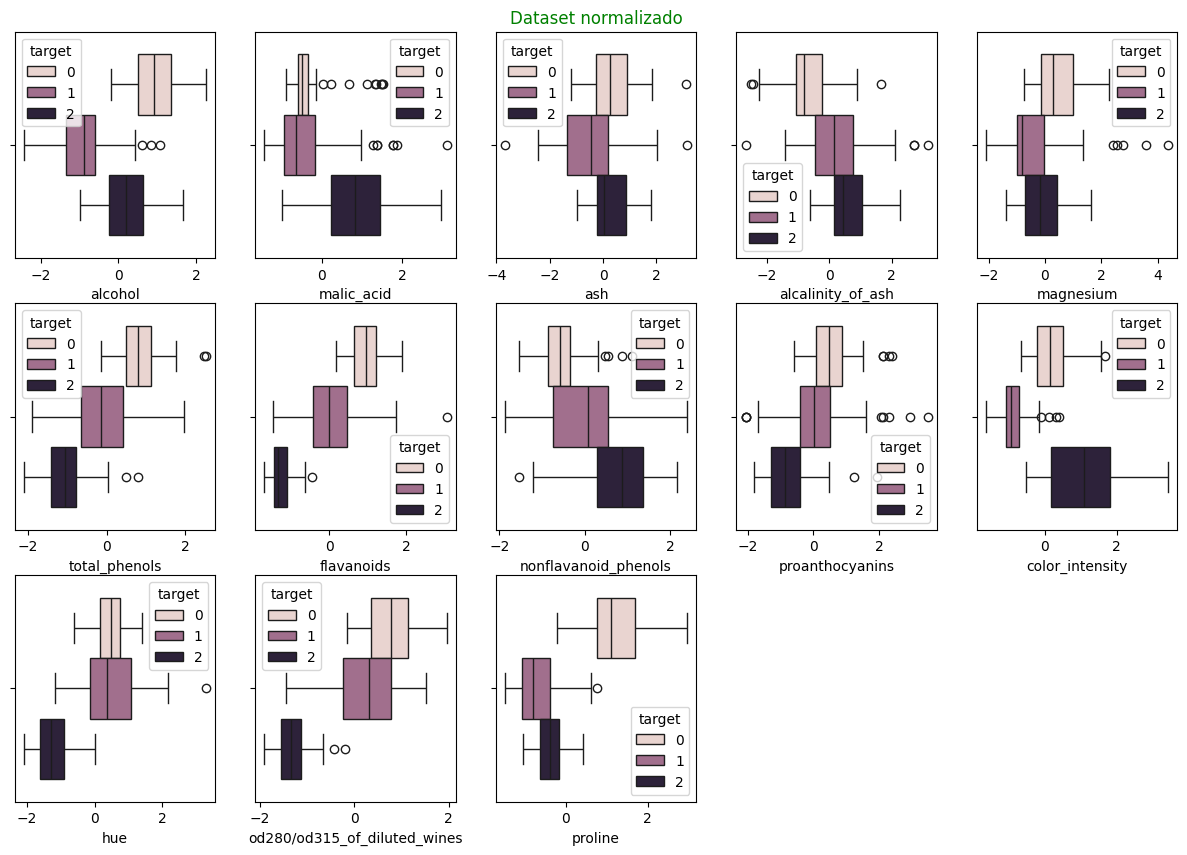

In [76]:
graficar_boxplots(X, y, "Dataset sin normalizar")
graficar_boxplots(X_scaled, y, "Dataset normalizado")

Se observa que la distribución de los datasets no se ve afectado por la normalización de los datos, solamente se cambian los valores de cada registro.

## II. Dispersión de datos según el nivel de alcohol

In [73]:
def graficar_dispersion(X, y, titulo):
    fig, ax = plt.subplots(4,3,figsize=(14,16),sharex=True)
    columnas = X.columns
    ax[0,1].set_title(titulo, color='green')
    for i, ax in enumerate(fig.axes):
        try:
            sns.scatterplot(data=X,x='alcohol',y=columnas[i+1],hue=y,ax=ax)
        except:
            ax.remove()

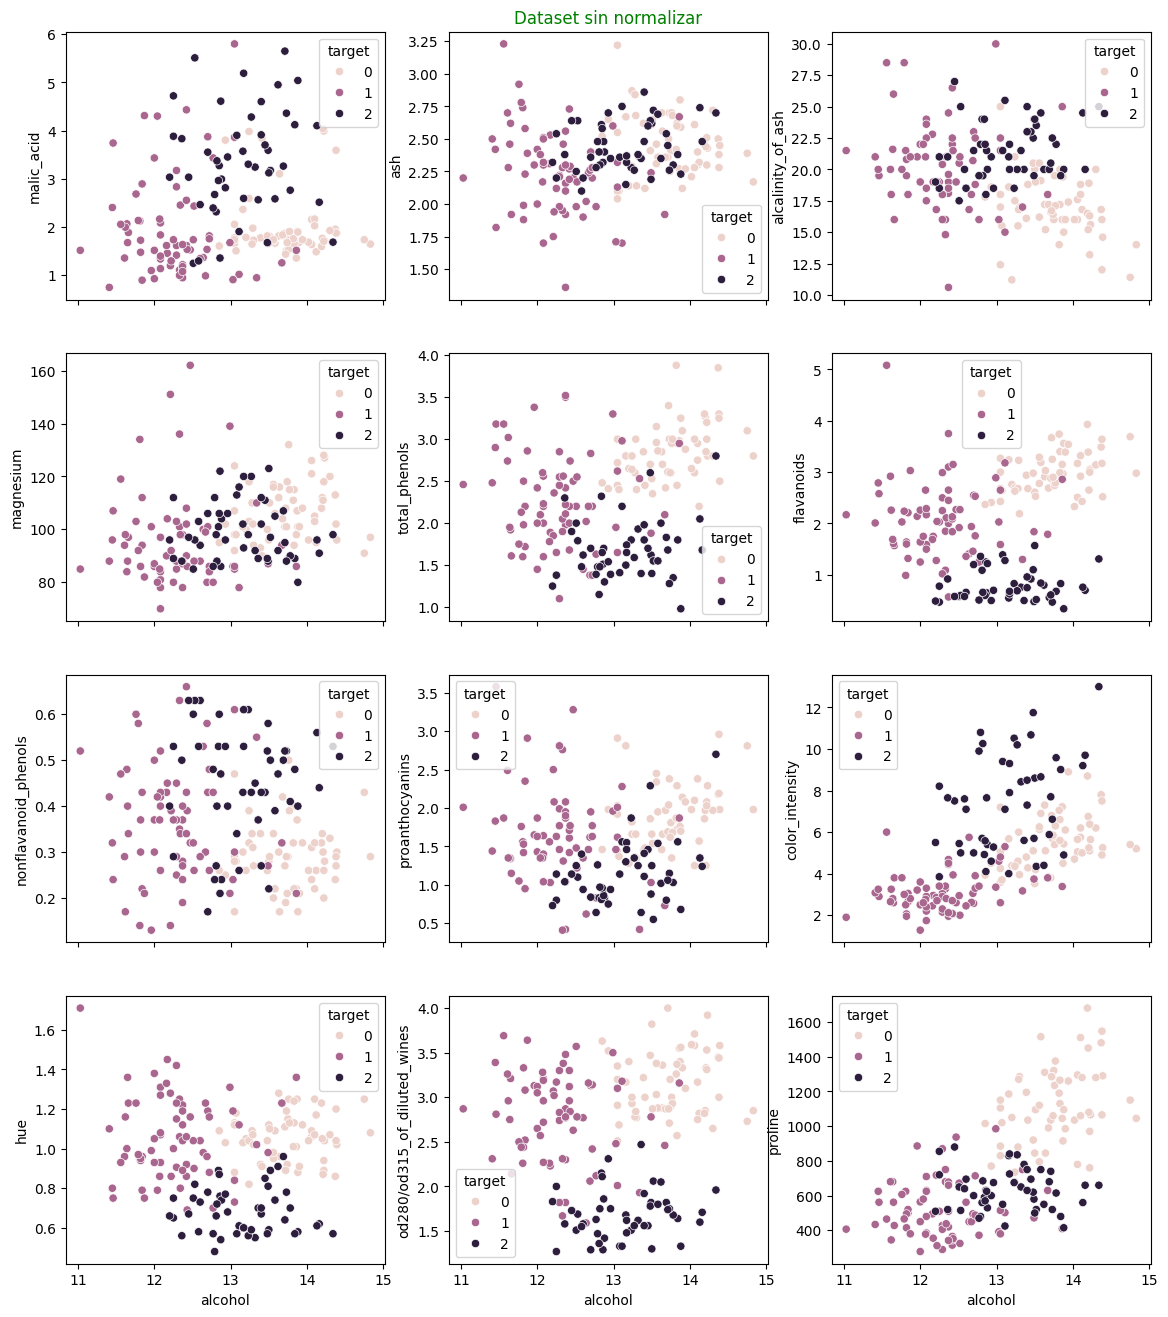

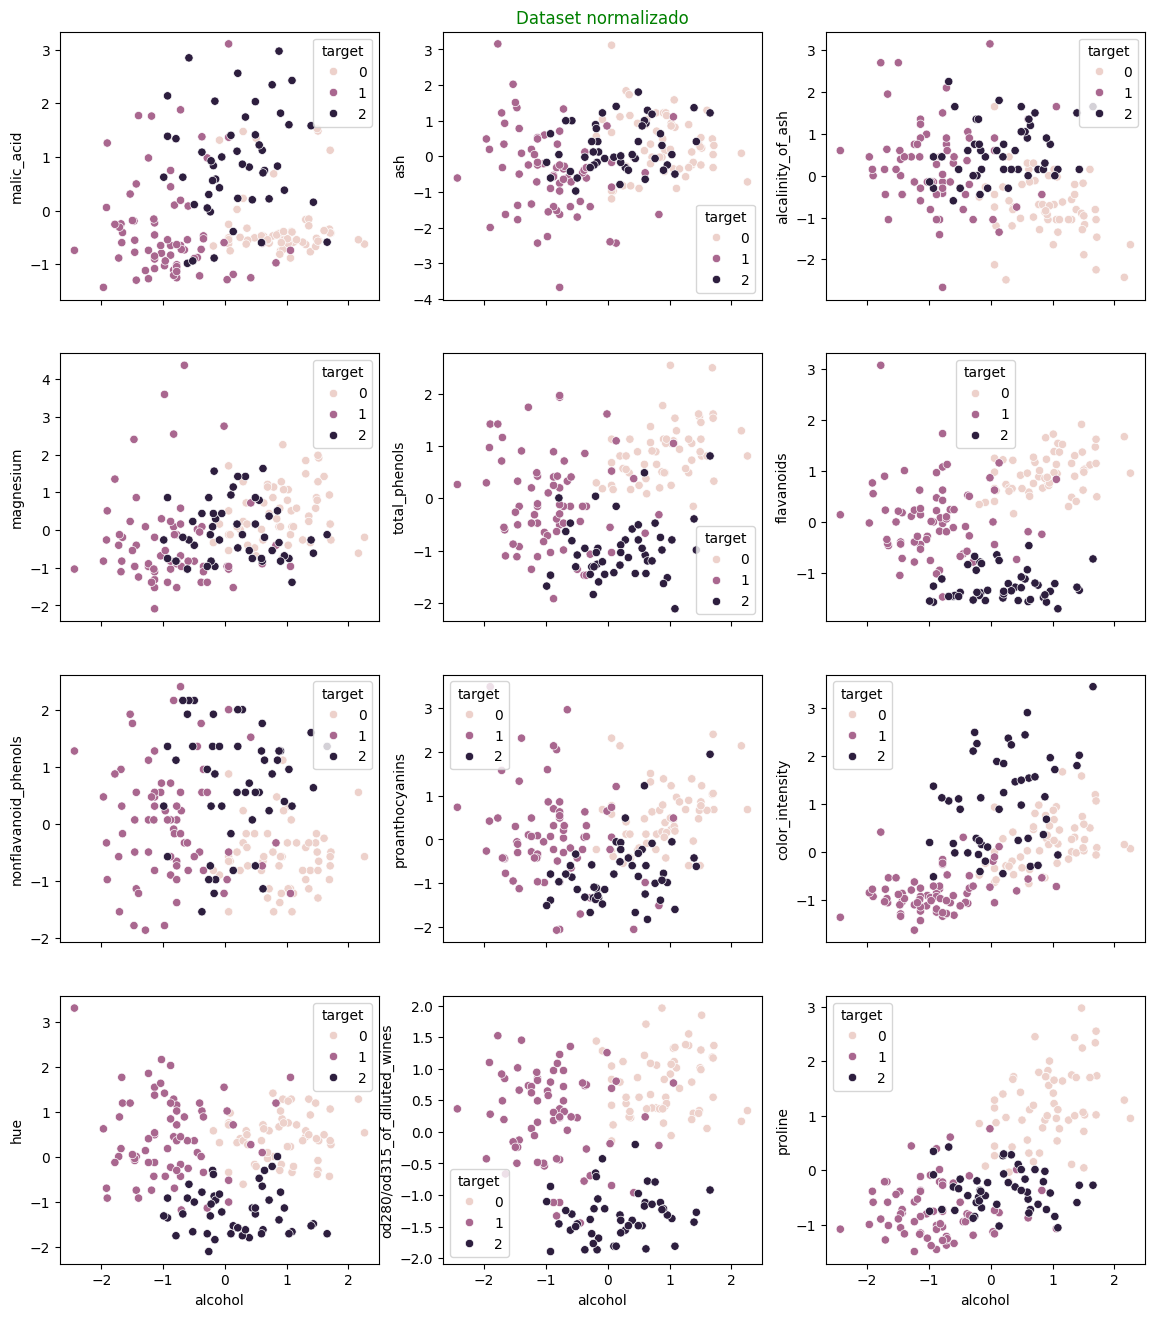

In [74]:
graficar_dispersion(X, y, "Dataset sin normalizar")
graficar_dispersion(X_scaled, y, "Dataset normalizado")

Nuevamente, se observa que la dispersión de los datos no se ve afectado por la normalización de los datasets, solamente se cambian los valores de cada registro.

Se observa también que los datos se encuentran fuertemente agrupados entre otros datos de la misma clase.

# Preparación de datos

Para poder calcular la precisión de los algoritmos que vamos a implementar, primero separaremos los datasets en una parte dedicada al entrenamiento de los modelos, y otra parte dedicada a los testeos de los mismos.

Utilizaremos el mismo random_state en ambos datasets para igualar los registros de entrenamiento y de test. Incorporamos el parámetro stratify para que la proporción de clases de la variable target sea igual en el set de train y en el set de test.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Implementación de K-nearest neighbors

Al trabajar con el algoritmo KNN, debemos tener en cuenta que se trata de un algoritmo perezoso, es decir, el algoritmo no aprende explícitamente un modelo cuando recibe los datos de entrenamiento, sino que la carga comptuacional más pesada se realiza en el momento de la predicción. Por lo tanto, se espera que la implementación sea rápido el algoritmo, pero a la hora de la predicción sea mucho más lento que otros algoritmos.

En primera instancia, vamos a crear un clasificador para cada dataset.

In [62]:
from sklearn import neighbors

def entrenar_knn(X_train, y_train, n_neighbors):
    # Creamos un clasificador, y le ajustamos los datos provenientes del entrenamiento.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X_train, y_train)
    return clf

n_neighbors = 5
clf = entrenar_knn(X_train, y_train, n_neighbors)
clf_scaled = entrenar_knn(X_scaled_train, y_train, n_neighbors)

Generados los clasificadores, vamos a generar el mapa de confusión y el cálculo de las precisiones de cada modelo. Para esto generaremos una función, que luego será usada en los siguientes algoritmos que se implementen.

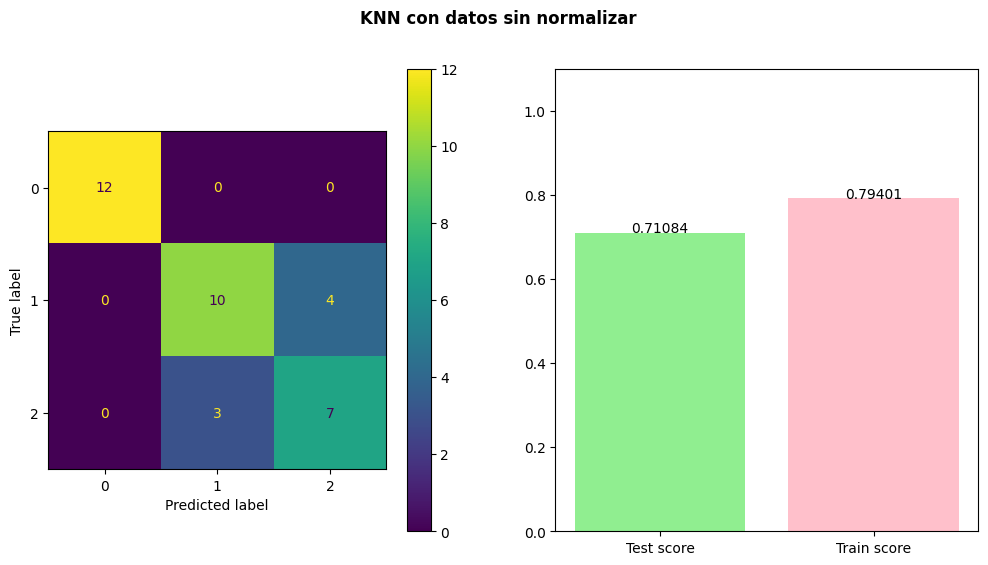

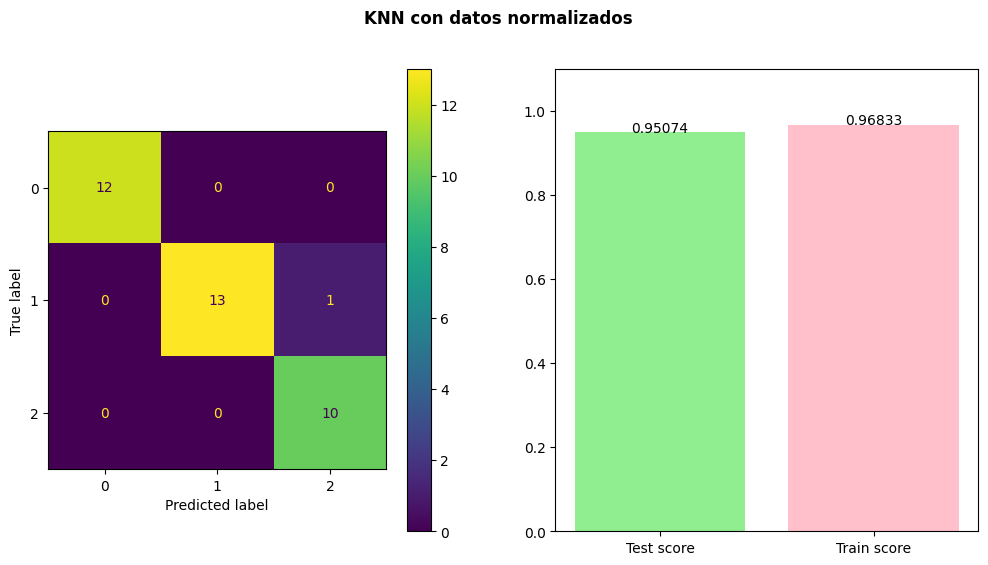

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_validate, StratifiedKFold

# Función que devuelve una figura con la predicción en base a un algoritmo y un conjunto de datos
def obtener_precision(nombre_modelo, modelo, X_train, X_test, y_train, y_test):

  # Predicción
  predicciones = modelo.predict(X_test)

  # Gráfico de matriz de confusión
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
  fig.suptitle(nombre_modelo, fontweight="bold")
  ConfusionMatrixDisplay(confusion_matrix(y_test, predicciones)).plot(ax=ax[0])

  # Medida de precisión
  kfold = StratifiedKFold(n_splits=5)
  cross_v = cross_validate(estimator=modelo, X=X_train, y=y_train, scoring="accuracy", cv=kfold, return_train_score=True)
  medidas = {"Test score": cross_v["test_score"].mean(),
             "Train score": cross_v["train_score"].mean()}

  # Impresión de medidas
  ax[1].bar(medidas.keys(),
            medidas.values(),
            color=["lightgreen", "pink"])
  ax[1].set(ylim=[0, 1.1])
  for i, medida in enumerate(medidas):
    ax[1].text(i, medidas[medida], round(medidas[medida], 5), ha="center")

  return fig

obtener_precision("KNN con datos sin normalizar", clf, X_train, X_test, y_train, y_test)
obtener_precision("KNN con datos normalizados", clf_scaled, X_scaled_train, X_scaled_test, y_train, y_test);

Como se puede observar, la precisión sobre el set de test es del 71% para el algoritmo con datos no normalizados, con respecto a un 95% para el algoritmo con datos normalizados. Es decir, el algoritmo genera mejores predicciones cuando los datos se encuentran normalizados. 

La normalización es sumamente importante para el algoritmo de KNN, ya que ayuda a traer a todas las variables a una escala similar, previniendo que algunas variables tengan mayor predominancia sobre otras en el cálculo de las distancias, simplemente porque tienen mayores magnitudes.

# Implementación de Árboles de decisión

De forma similar al algoritmo de KNN, crearemos una función que se encargue de instanciar el algoritmo y entrenarlo para los dos datasets.

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def entrenar_arbol(X_train, y_train, max_depth):
    arbol = DecisionTreeClassifier(max_depth=max_depth)
    arbol.fit(X_train, y_train)
    return arbol

max_depth = 3
arbol = entrenar_arbol(X_train, y_train, max_depth)
arbol_scaled = entrenar_arbol(X_scaled_train, y_train, max_depth)

Procedemos a graficar el árbol de decisión para cada dataset.

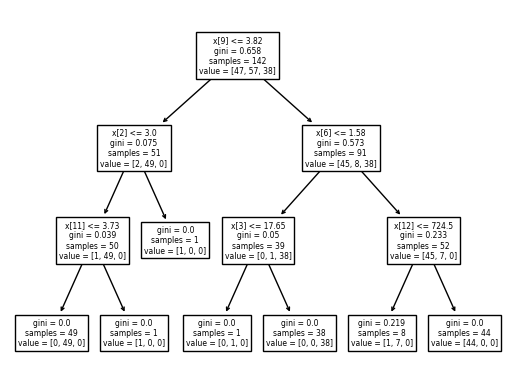

In [88]:
plot_tree(arbol);

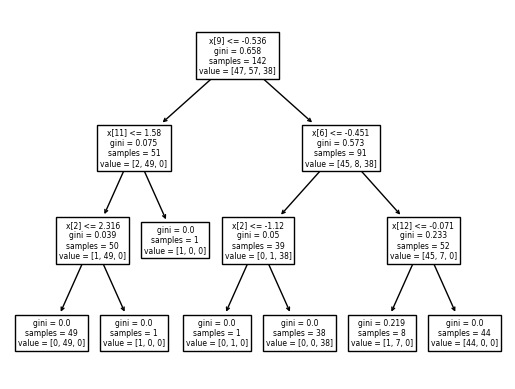

In [89]:
plot_tree(arbol_scaled);

Por último, calculamos la matriz de confusión y la precisión de ambos algoritmos, reutilizando la función anteriormente desarrollada en el algoritmo de KNN.

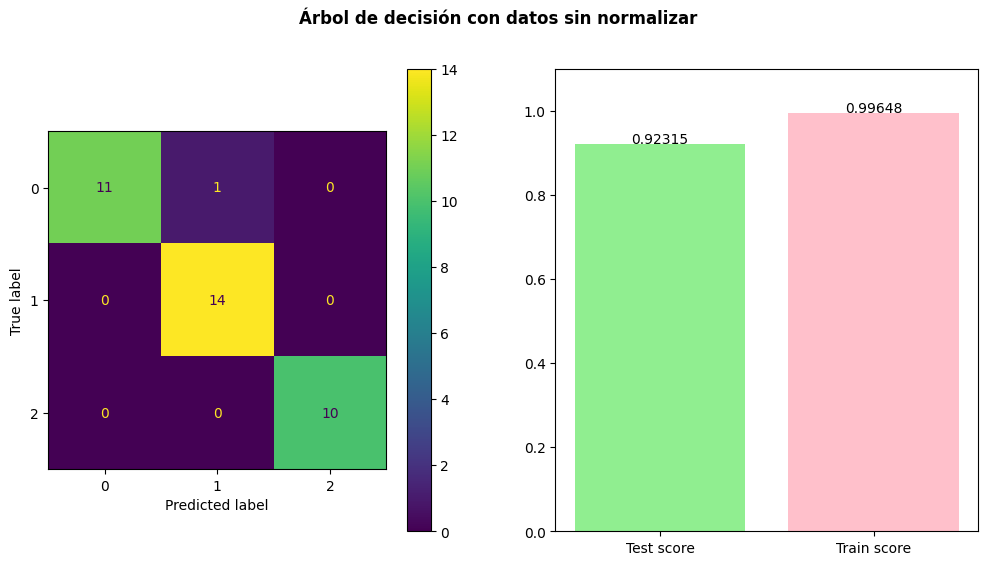

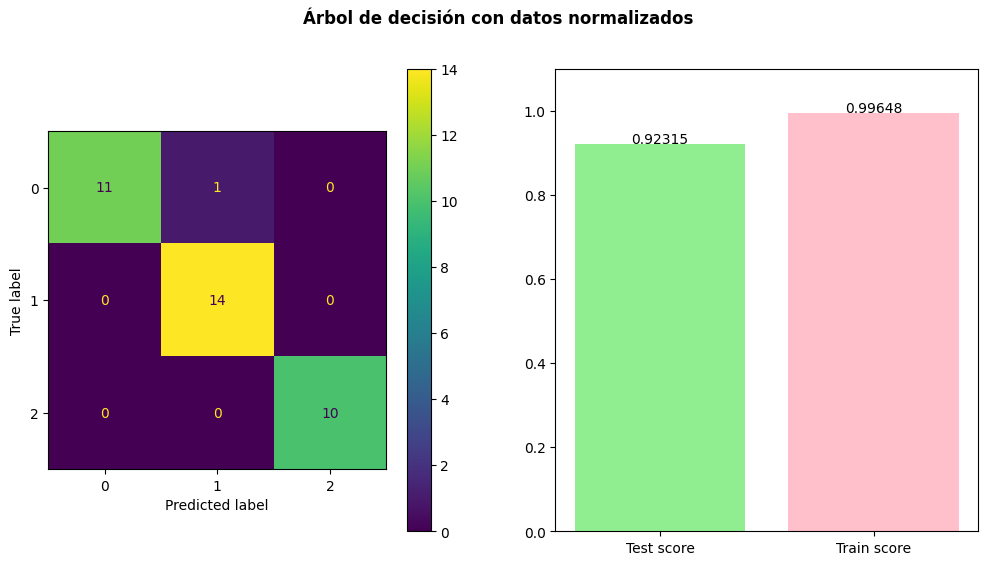

In [84]:
obtener_precision("Árbol de decisión con datos sin normalizar", arbol, X_train, X_test, y_train, y_test)
obtener_precision("Árbol de decisión con datos normalizados", arbol_scaled, X_scaled_train, X_scaled_test, y_train, y_test);

Para el caso del algoritmo de árbol de decisión, observamos que normalizar los datos no supone un incremento en la precisión de las predicciones. Esto se debe a que este tipo de algoritmo no toma decisiones en base a distancias entre puntos (como KNN), por lo que diferencias entre escalas muy grandes no supone un riesgo en la integridad del modelo.

# Implementación de K-means